# Pandas for Lost Voices CSV


## Import the Tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



## Import the CSV Created by Lost Voices

- CSV files can be uploaded from your computer.


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Du Chemin Production Data - Similar_Cadences.csv to Du Chemin Production Data - Similar_Cadences (1).csv


In [ ]:
## Check the directory where your uploaded file is stored
!pwd
!ls
#!rm Collab_d

/content
'Du Chemin Production Data - Similar_Cadences.csv'   sample_data


## Name the Important File as a DataSet
- Give the imported file a simple name to be used in the subsequent analysis and visualization.  For instance `Data_Name =`
- Pandas will read the csv, but be sure to check the path and file name: `pd.read_csv('/content/Stras_Brumel_Exact_V5_P4.csv')`

In [ ]:
df = pd.read_csv ('/content/Du Chemin Production Data - Similar_Cadences.csv')

## Inspect It 
- The `.head(n)` allows you to check the columns and contents.  `n` determines the number of rows in the preview.

In [ ]:
df.head(5)

,phrase_number,composition_number,cadence_role_cantz,cadence_alter,cadence_final_tone,cadence_role_tenz,cadence_kind,cadence_final_tone_before,cadence_final_tone_after,cadence_kind_before,cadence_kind_after,final_cadence
0,DC0625.8: Dont nous serons plus contentz qu'eulx.,DC0625: Si je n'avois de fermeté,S,NaN,G,T,Authentic,A,None,Authentic,None,G
1,"DC0625.6: Ami perfaict plus que les dieux,",DC0625: Si je n'avois de fermeté,S,NaN,A,T,Authentic,D,G,Plagal,Authentic,G
2,"DC0625.5: Mais ne fault point que doubte on face,",DC0625: Si je n'avois de fermeté,None,NaN,D,None,Plagal,G,A,Authentic,Authentic,G
3,"DC0625.2: Non plus que j'ay de bonne grace,",DC0625: Si je n'avois de fermeté,S,NaN,G,T,Authentic,C,D,Authentic,Plagal,G
4,"DC0625.1: Si je n'avois de fermeté,",DC0625: Si je n'avois de fermeté,T,"Displaced, Inverted, Evaded",C,Ct,Authentic,None,G,None,Authentic,G


## Get Basic Information
- Another overview with `.info()` provides the total dimensions (rows + columns), plus the column names.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   phrase_number              1195 non-null   object
 1   composition_number         1195 non-null   object
 2   cadence_role_cantz         1168 non-null   object
 3   cadence_alter              753 non-null    object
 4   cadence_final_tone         1195 non-null   object
 5   cadence_role_tenz          1168 non-null   object
 6   cadence_kind               1195 non-null   object
 7   cadence_final_tone_before  1195 non-null   object
 8   cadence_final_tone_after   1195 non-null   object
 9   cadence_kind_before        1195 non-null   object
 10  cadence_kind_after         1195 non-null   object
 11  final_cadence              1195 non-null   object
dtypes: object(12)
memory usage: 112.2+ KB


## Get "Counts" for Values of a Particular Column
- For any column in the data_set, `['Column_Name']` in the code below, like `data_set_name['Column_Name'].value_counts()`



In [ ]:
df['cadence_final_tone'].value_counts()


G         305
D         277
C         191
F         166
A         140
B-flat     83
E          31
None        2
Name: cadence_final_tone, dtype: int64

## Plot Values as Histogram

Now using the matlib plotly resource, we can visualize in various formats
In the code below:
- `(fisgsize=(16,6))` determines the size of the image (w,h)
- `data=name` = name given the imported file above
- `x='column_name'` is the column to use for the X axis
- `hue='column_name` is the column to use for the colors (and key)


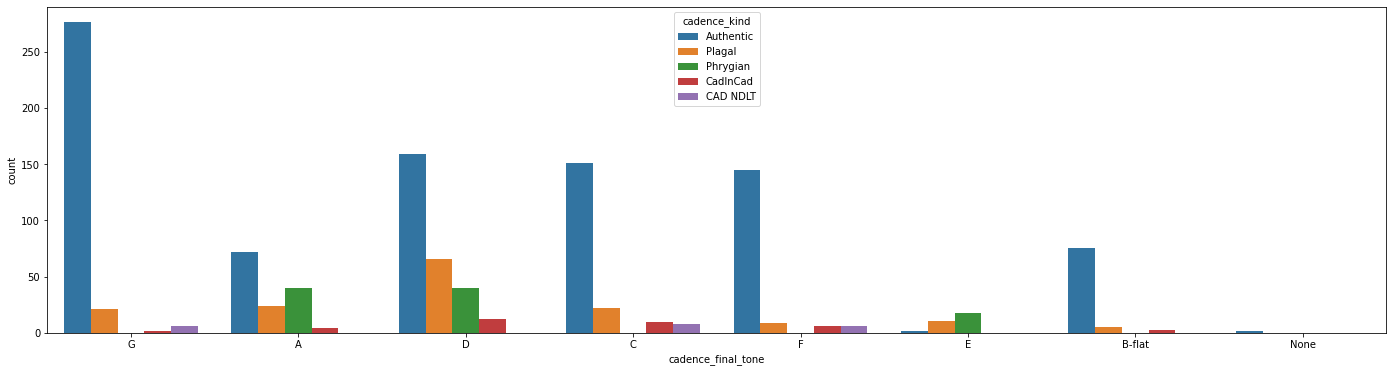

In [ ]:
plt.figure(figsize=(24,6))
sns.countplot(x='cadence_final_tone',data=df, hue='cadence_kind');

## Get Data for an Individual Value with a Column
- For example:  a particular Piece within `Piece_Title`
- By default Pandas will display just the first and last five rows of the result.
- To show show more (or less), add: `pd.set_option("max_rows", None)`.  Note that in this case `None` means "no maximium, or ALL."

## Sort Data According to Selected Columns
- We can also put data in order (ascending/descending) by one more more columns.
- Giving this sorted version a new name will allow us to export or display it in this state.

In [ ]:
df.sort_values(['cadence_final_tone','cadence_kind'])
Sorted = df.sort_values(['cadence_final_tone','cadence_kind'])
Sorted.head()

,phrase_number,composition_number,cadence_role_cantz,cadence_alter,cadence_final_tone,cadence_role_tenz,cadence_kind,cadence_final_tone_before,cadence_final_tone_after,cadence_kind_before,cadence_kind_after,final_cadence
1,"DC0625.6: Ami perfaict plus que les dieux,",DC0625: Si je n'avois de fermeté,S,NaN,A,T,Authentic,D,G,Plagal,Authentic,G
40,"DC0615.6: Ne me chault d'acquerir leurs graces,","DC0615: N'ayez plus peur, mary jaloux",S,NaN,A,T,Authentic,F,C,Authentic,Authentic,F
87,"DC0604.7: Mais s'advenu m'estoit par ignorance,","DC0604: Où est ce temps, dictes, mademoiselle",S,Evaded,A,T,Authentic,D,G,Plagal,Authentic,G
93,"DC0603.8: Dont ja commence à m’ennuyer ma vie,",DC0603: Or à ce jour le verd may se termine,S,NaN,A,T,Authentic,D,A,Authentic,Authentic,D
97,"DC0603.3: Las est à moy tout mon verd si se fine,",DC0603: Or à ce jour le verd may se termine,T,"Displaced, Inverted, Evaded",A,Ct,Authentic,A,A,Plagal,Plagal,D


## Seaborn Plots
- An extension of the MatPlot library, Seaborn provides various views of the data using three 'dimensions' of information for position and color.
- See samples: https://seaborn.pydata.org/examples/index.html
- This is a 'swarmplot', `data=Heth` determines the data to use, `y="Pattern_Matched"` determines y axis, `x="First_Note_Measure_Number"` determines x axis, and `hue="Part"` determines color and key.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

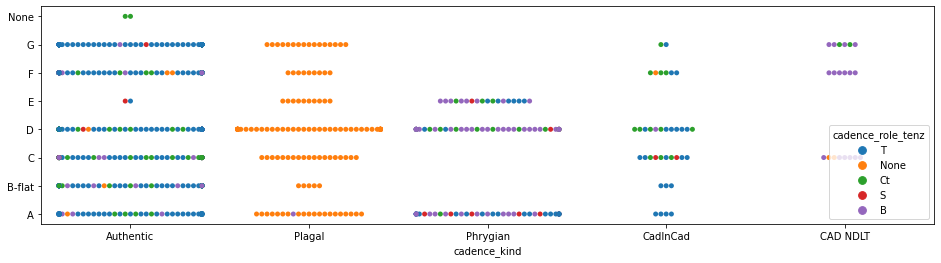

In [ ]:
# Draw a categorical scatterplot to show each observation
# The problem here is that there are too many data points to display properly with swarmplot for Du Chemin Cadences
plt.figure(figsize=(16,4))
ax = sns.swarmplot(data=df, y="cadence_final_tone", x="cadence_kind", hue="cadence_role_tenz");
ax.set(ylabel="")

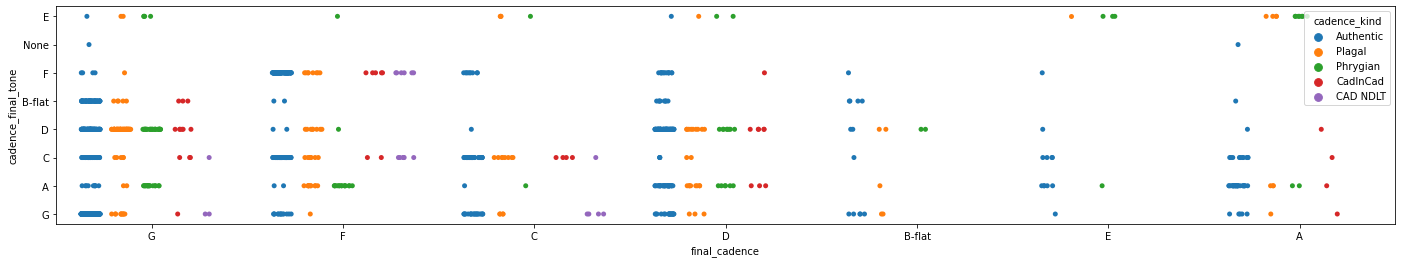

In [ ]:
#Strip Plot manages the Du Chemin Cadence Data OK
# X plots the Last Cadence of the Piece

plt.figure(figsize=(24,4))
p = sns.stripplot(data=df,
                  x='final_cadence',
                  y='cadence_final_tone',
                  hue='cadence_kind',
                  jitter=.25,
                  dodge=True)

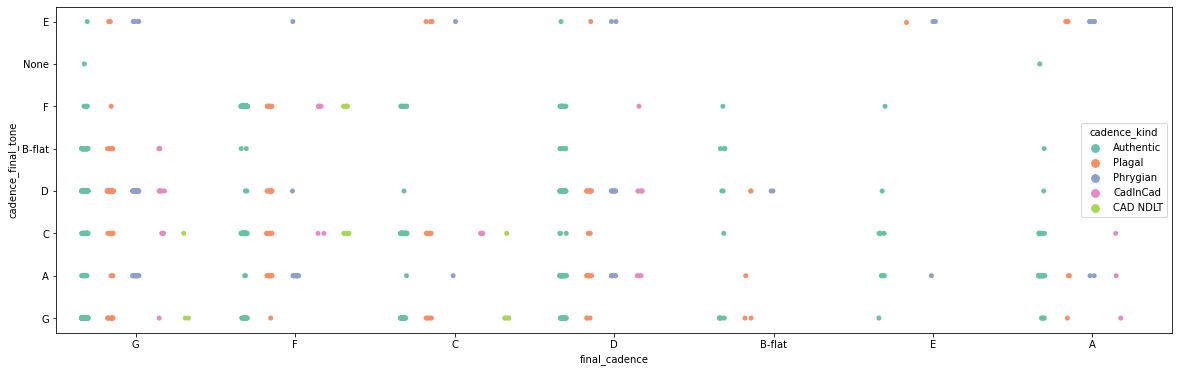

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.stripplot(x="final_cadence", y="cadence_final_tone", hue="cadence_kind",
                   data=df, palette="Set2", dodge=True)

# Grouping

In [ ]:
grouped = df.groupby(['cadence_final_tone', 'final_cadence'])
#grouped.describe()
gb = df.groupby("final_cadence")
gb.count() # or,
grouped.head()
#pd.DataFrame(grouped)
#DF_output = pd.DataFrame(grouped)
#DF_output.to_csv("grouped_test.csv")

,phrase_number,composition_number,cadence_role_cantz,cadence_alter,cadence_final_tone,cadence_role_tenz,cadence_kind,cadence_final_tone_before,cadence_final_tone_after,cadence_kind_before,cadence_kind_after,final_cadence
0,DC0625.8: Dont nous serons plus contentz qu'eulx.,DC0625: Si je n'avois de fermeté,S,NaN,G,T,Authentic,A,None,Authentic,None,G
1,"DC0625.6: Ami perfaict plus que les dieux,",DC0625: Si je n'avois de fermeté,S,NaN,A,T,Authentic,D,G,Plagal,Authentic,G
2,"DC0625.5: Mais ne fault point que doubte on face,",DC0625: Si je n'avois de fermeté,None,NaN,D,None,Plagal,G,A,Authentic,Authentic,G
3,"DC0625.2: Non plus que j'ay de bonne grace,",DC0625: Si je n'avois de fermeté,S,NaN,G,T,Authentic,C,D,Authentic,Plagal,G
4,"DC0625.1: Si je n'avois de fermeté,",DC0625: Si je n'avois de fermeté,T,"Displaced, Inverted, Evaded",C,Ct,Authentic,None,G,None,Authentic,G
...,...,...,...,...,...,...,...,...,...,...,...,...
996,"DC0207.3: L’on en veit oncques de si belle,","DC0207: Joye et santé, ma demoiselle",S,Evaded,D,T,Phrygian,G,G,Authentic,Authentic,B-flat
1082,DC0118.9: Vous les ferez tous vifz crever de r...,DC0118: Vrais amateurs du plaisir de Vénus,S,None,G,T,Authentic,E,A,Phrygian,Authentic,A
1083,DC0118.8: Besongnez donc et de jour et de nuict.,DC0118: Vrais amateurs du plaisir de Vénus,Ct,Displaced,E,B,Phrygian,A,G,Authentic,Authentic,A
1097,DC0116.8: As tu osé luy faire un tel oultrage?,"DC0116: Maistre Ambrelin, confesseur de nonettes",B,"Displaced, Inverted",E,Ct,Phrygian,E,C,Plagal,Authentic,A
